In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


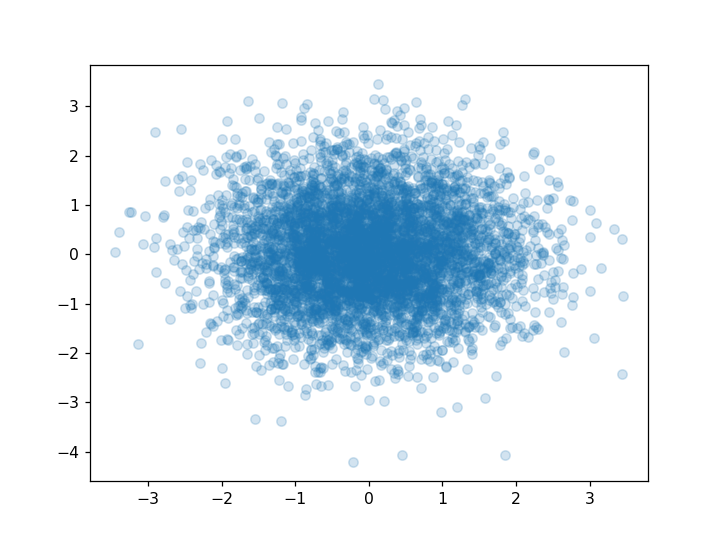

In [31]:
X = np.random.randn(5000)
Y = np.random.randn(5000)

fig, ax = plt.subplots()
ax.scatter(X, Y, alpha=.2)

In [39]:
import yfinance as yf
yf.pdr_override()
from datetime import datetime


In [43]:
tickers = ["AAPL", "TWTR", "IBM", "PLTR", "^GSPC"]
data = pdr.get_data_yahoo(tickers, start)
start = datetime(2021, 1, 1)
ticker_a = "AAPL"
ticker_b = "^GSPC"

[*********************100%***********************]  5 of 5 completed


In [44]:
data = data["Adj Close"]

In [45]:
data.head()

,AAPL,IBM,PLTR,TWTR,^GSPC
Date,,,,,
2021-01-04 00:00:00-05:00,127.679993,106.178665,23.370001,54.529999,3700.649902
2021-01-05 00:00:00-05:00,129.258591,108.063393,24.600000,53.880001,3726.860107
2021-01-06 00:00:00-05:00,124.907562,110.761978,23.540001,53.259998,3748.139893
2021-01-07 00:00:00-05:00,129.169830,110.504967,25.000000,52.330002,3803.790039
2021-01-08 00:00:00-05:00,130.284683,110.110909,25.200001,51.480000,3824.679932


In [46]:
log_returns = np.log(data/data.shift())

In [48]:
log_returns

,AAPL,IBM,PLTR,TWTR,^GSPC
Date,,,,,
2021-01-04 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2021-01-05 00:00:00-05:00,0.012288,0.017595,0.051293,-0.011992,0.007058
2021-01-06 00:00:00-05:00,-0.034241,0.024666,-0.044045,-0.011574,0.005694
2021-01-07 00:00:00-05:00,0.033554,-0.002323,0.060175,-0.017616,0.014738
2021-01-08 00:00:00-05:00,0.008594,-0.003572,0.007968,-0.016376,0.005477
...,...,...,...,...,...
2023-02-13 00:00:00-05:00,0.018632,0.012823,0.013228,NaN,0.011384
2023-02-14 00:00:00-05:00,-0.004234,-0.009804,0.191912,NaN,-0.000280
2023-02-15 00:00:00-05:00,0.013808,0.002863,0.092150,NaN,0.002769


In [62]:
alpha, beta
#if apple goes up 1 unit the the market goes 0.51 expected

(9.72551358639686e-06, 0.5178667650320298)

In [66]:

def linear_regression(ticker_a, ticker_b): 
    X = log_returns[ticker_a].iloc[1:].to_numpy().reshape(-1, 1)
    Y = log_returns[ticker_b].iloc[1:].to_numpy().reshape(-1, 1)

    lin_reg = LinearRegression()
    lin_reg.fit(X, Y)

    Y_pred = lin_reg.predict(X)
    alpha = lin_reg.intercept_[0]
    beta = lin_reg.coef_[0, 0]


    fig, ax= plt.subplots()
    ax.set_title("Alpha: " + str(round(alpha, 5)) +", Beta: "+ str(round(beta, 3)))
    ax.scatter(X, Y)
    ax.plot(X, Y_pred, "--r")

<IPython.core.display.Javascript object>


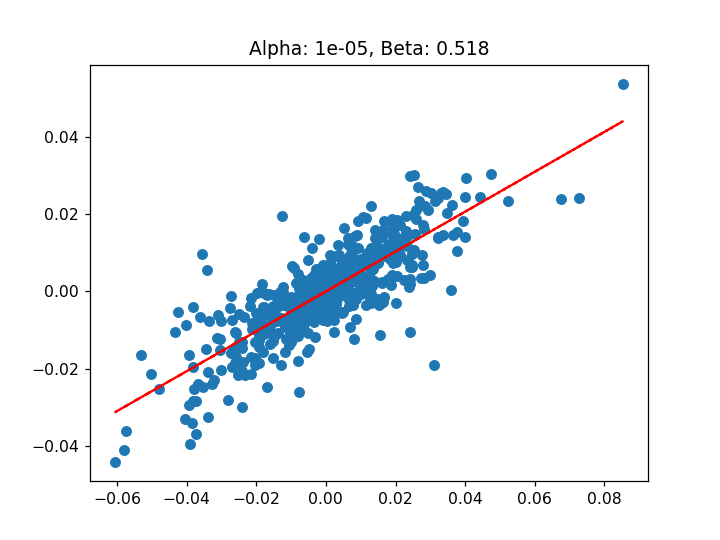

In [67]:
linear_regression("AAPL", "^GSPC")

<IPython.core.display.Javascript object>


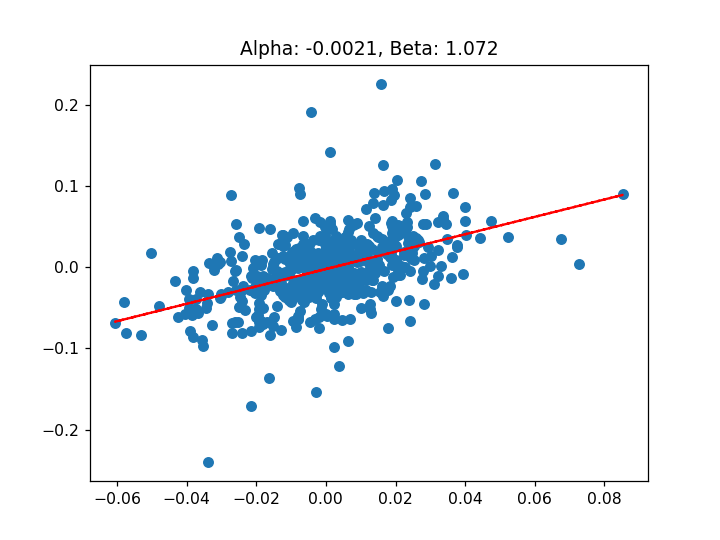

In [68]:
linear_regression("AAPL", "PLTR")
#more scattered